In [3]:
import pandas as pd

# full_df = pd.read_csv("~/HussainLab/GNN_Cancer/data/master_data_gene_names.tsv")
full_df = pd.read_csv("~/HussainLab/GNN_Cancer/data/master_data_gene_names.tsv")
print(full_df.head())

/home/arifai/.local/lib/python3.10/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/tmp/ipykernel_8069/3523741001.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174

      SAMPLE      sample 1      sample 2      sample 3      sample 4  \
0  gleason_1           NaN           NaN           NaN             4   
1  gleason_2           NaN           NaN           NaN             3   
2   decipher       Average        Higher        Higher        Higher   
3       race            EA            AA            EA            AA   
4    FAM159A  -0.195433783  -0.031498423  -0.076675905  -0.093456436   

       sample 5      sample 6      sample 7      sample 8      sample 9  ...  \
0             4             3             3             4             3  ...   
1             3             4             4             3             4  ...   
2       Average       Average         Lower        Higher         Lower  ...   
3            AA            AA            AA            EA            EA  ...   
4  -0.255263756  -0.042948442  -0.120059635  -0.058722393  -0.006506473  ...   

    sample 1143   sample 1144   sample 1145   sample 1146   sample 1147  \
0          

In [4]:
# Calculate gleason_tot
gleason_1 = full_df.loc[full_df['SAMPLE'] == 'gleason_1'].iloc[:, 1:].astype(float)
print(gleason_1)
gleason_2 = full_df.loc[full_df['SAMPLE'] == 'gleason_2'].iloc[:, 1:].astype(float)
print(gleason_2)
gleason_tot = gleason_1.values + gleason_2.values
print(gleason_tot)


   sample 1  sample 2  sample 3  sample 4  sample 5  sample 6  sample 7  \
0       NaN       NaN       NaN       4.0       4.0       3.0       3.0   

   sample 8  sample 9  sample 10  ...  sample 1143  sample 1144  sample 1145  \
0       4.0       3.0        3.0  ...          3.0          5.0          3.0   

   sample 1146  sample 1147  sample 1148  sample 1149  sample 1150  \
0          4.0          4.0          4.0          4.0          3.0   

   sample 1151  sample 1152  
0          4.0          4.0  

[1 rows x 1152 columns]
   sample 1  sample 2  sample 3  sample 4  sample 5  sample 6  sample 7  \
1       NaN       NaN       NaN       3.0       3.0       4.0       4.0   

   sample 8  sample 9  sample 10  ...  sample 1143  sample 1144  sample 1145  \
1       3.0       4.0        4.0  ...          4.0          3.0          4.0   

   sample 1146  sample 1147  sample 1148  sample 1149  sample 1150  \
1          5.0          5.0          5.0          3.0          4.0   

   sample

In [5]:
# Create a new row for gleason_tot
gleason_tot_row = pd.DataFrame([['gleason_tot'] + gleason_tot.tolist()[0]], columns=full_df.columns)

# Append gleason_tot to the DataFrame
full_df = pd.concat([gleason_tot_row, full_df], ignore_index=True)
print(full_df.head())

        SAMPLE sample 1 sample 2 sample 3 sample 4 sample 5 sample 6 sample 7  \
0  gleason_tot      NaN      NaN      NaN      7.0      7.0      7.0      7.0   
1    gleason_1      NaN      NaN      NaN        4        4        3        3   
2    gleason_2      NaN      NaN      NaN        3        3        4        4   
3     decipher  Average   Higher   Higher   Higher  Average  Average    Lower   
4         race       EA       AA       EA       AA       AA       AA       AA   

  sample 8 sample 9  ... sample 1143 sample 1144 sample 1145 sample 1146  \
0      7.0      7.0  ...         7.0         8.0         7.0         9.0   
1        4        3  ...           3           5           3           4   
2        3        4  ...           4           3           4           5   
3   Higher    Lower  ...      Higher       Lower       Lower      Higher   
4       EA       EA  ...          EA          EA          EA          EA   

  sample 1147 sample 1148 sample 1149 sample 1150 sample

In [6]:
# Define the rows to keep
rows_to_keep = ['gleason_tot', 'decipher', 'race', 
                'HSDB31', 'HSD3B2; HSD3BP4', 'CYP3A43', 'CYP11A1', 'CYP11B1', 'CYP17A1', 'AR']

# Filter the DataFrame
df_filtered = full_df[full_df['SAMPLE'].isin(rows_to_keep)]
df_filtered.loc[df_filtered['SAMPLE'] == 'HSD3B2; HSD3BP4', 'SAMPLE'] = 'HSD3B2'
print(df_filtered)

            SAMPLE      sample 1     sample 2      sample 3      sample 4  \
0      gleason_tot           NaN          NaN           NaN           7.0   
3         decipher       Average       Higher        Higher        Higher   
4             race            EA           AA            EA            AA   
180         HSD3B2  -0.128181673  -0.09495045  -0.076433906  -0.179854973   
5895       CYP3A43     -0.019884     0.002117     -0.049298      0.024175   
7010       CYP11B1      0.191588     0.223551      0.188503      0.024981   
8242       CYP17A1      0.027544    -0.036152      0.047027     -0.200203   
11564      CYP11A1      0.005775     -0.03563     -0.040826     -0.174312   
16054           AR      0.428737      0.52952      0.148835      0.768648   

           sample 5      sample 6      sample 7      sample 8      sample 9  \
0               7.0           7.0           7.0           7.0           7.0   
3           Average       Average         Lower        Higher         L

In [7]:
apuc6_genes = ['HSD3B2', 'CYP3A43', 'CYP11A1', 'CYP11B1', 'CYP17A1']
# Filter the DataFrame for the genes of interest
apuc6_data = df_filtered[df_filtered['SAMPLE'].isin(apuc6_genes)].iloc[:, 1:]

# Convert columns to numeric, setting errors='coerce' to handle non-numeric values
apuc6_data = apuc6_data.apply(pd.to_numeric, errors='coerce')

# Calculate the mean, considering only numeric columns
apuc6_scores = apuc6_data.mean(numeric_only=True)

# Extract AR expression
ar_expression = df_filtered[df_filtered['SAMPLE'].isin(['AR'])].iloc[:, 1:].values.flatten()

# Extract race information
race_info = df_filtered[df_filtered['SAMPLE'] == 'race'].iloc[:, 1:].values.flatten()

# Extract Gleason scores
gleason_scores = df_filtered[df_filtered['SAMPLE'] == 'gleason_tot'].iloc[:, 1:].values.flatten()

decipher_scores = df_filtered[df_filtered['SAMPLE'] == 'decipher'].iloc[:, 1:].values.flatten()

print(len(apuc6_scores))
print(len(ar_expression))
print(len(race_info))
print(len(gleason_scores))
print(len(decipher_scores))

1152
1152
1152
1152
1152


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

plot_data = pd.DataFrame({
    'APUC-6 Score': apuc6_scores,
    'AR Expression': ar_expression,
    'Race': race_info,
    'Gleason Score': gleason_scores,
    'Decipher Score': decipher_scores
})


/tmp/ipykernel_8069/3902864578.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')


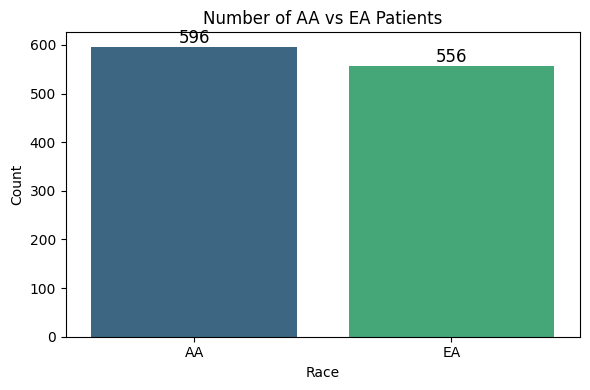

/tmp/ipykernel_8069/3902864578.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Race', y='APUC-6 Score', data=plot_data, palette='Set2')
/tmp/ipykernel_8069/3902864578.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Race', y='AR Expression', data=plot_data, palette='Set2')


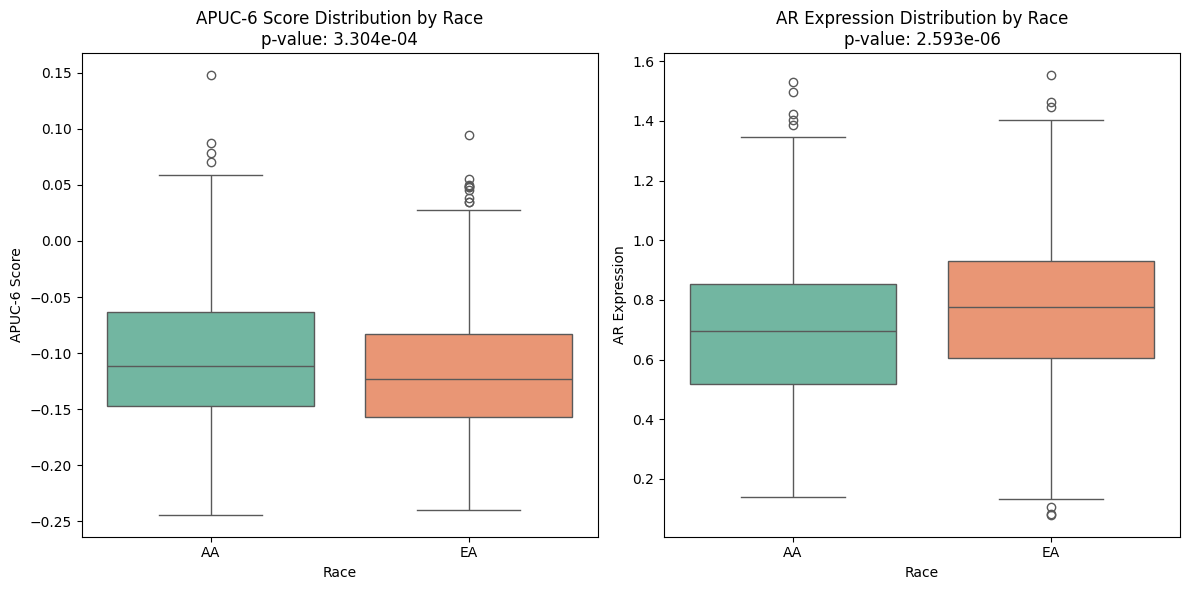

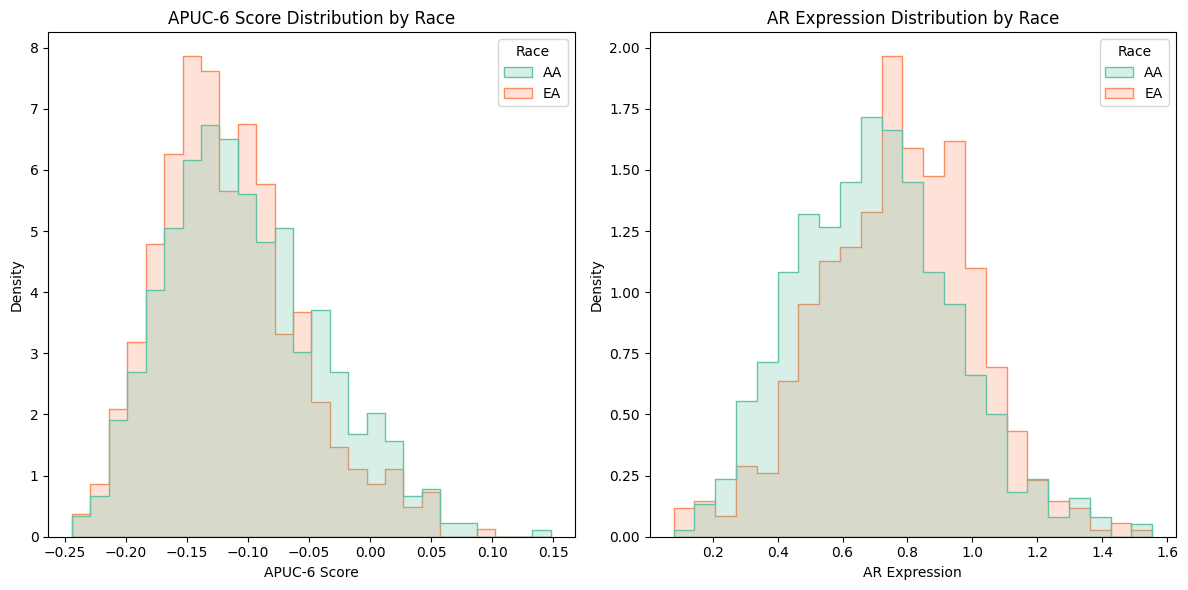

In [9]:
# 1. Count the number of AA vs EA patients
race_counts = plot_data['Race'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')

# Annotate the bar plot with the count values
for index, value in enumerate(race_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Number of AA vs EA Patients')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('/home/user/cloud_storage/aa_vs_ea_patients.png')
plt.show()


# Convert data to numeric and drop NaN values
plot_data['APUC-6 Score'] = pd.to_numeric(plot_data['APUC-6 Score'], errors='coerce')
plot_data['AR Expression'] = pd.to_numeric(plot_data['AR Expression'], errors='coerce')
plot_data.dropna(inplace=True)

# Perform statistical tests
aa_apuc6 = plot_data[plot_data['Race'] == 'AA']['APUC-6 Score']
ea_apuc6 = plot_data[plot_data['Race'] == 'EA']['APUC-6 Score']
aa_ar = plot_data[plot_data['Race'] == 'AA']['AR Expression']
ea_ar = plot_data[plot_data['Race'] == 'EA']['AR Expression']

# Use t-test
apuc6_pvalue = ttest_ind(aa_apuc6, ea_apuc6, nan_policy='omit').pvalue
ar_pvalue = ttest_ind(aa_ar, ea_ar, nan_policy='omit').pvalue

# Plot box and whisker plots with p-values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Race', y='APUC-6 Score', data=plot_data, palette='Set2')
plt.title(f'APUC-6 Score Distribution by Race\np-value: {apuc6_pvalue:.3e}')
plt.subplot(1, 2, 2)
sns.boxplot(x='Race', y='AR Expression', data=plot_data, palette='Set2')
plt.title(f'AR Expression Distribution by Race\np-value: {ar_pvalue:.3e}')
plt.tight_layout()
#plt.savefig('/home/user/cloud_storage/apuc6_ar_boxplot.png')

# Plot z-score distributions (since data is already normalized)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(plot_data, x='APUC-6 Score', hue='Race', element='step', stat='density', common_norm=False, palette='Set2')
plt.title('APUC-6 Score Distribution by Race')
plt.subplot(1, 2, 2)
sns.histplot(plot_data, x='AR Expression', hue='Race', element='step', stat='density', common_norm=False, palette='Set2')
plt.title('AR Expression Distribution by Race')
plt.tight_layout()
#plt.savefig('/home/user/cloud_storage/apuc6_ar_zscore_distribution.png')

plt.show()

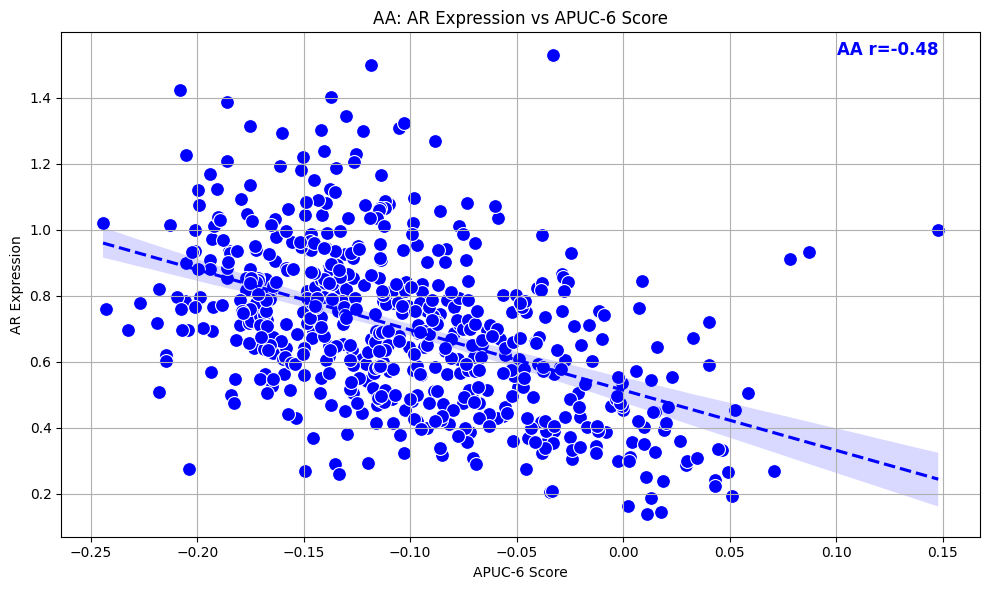

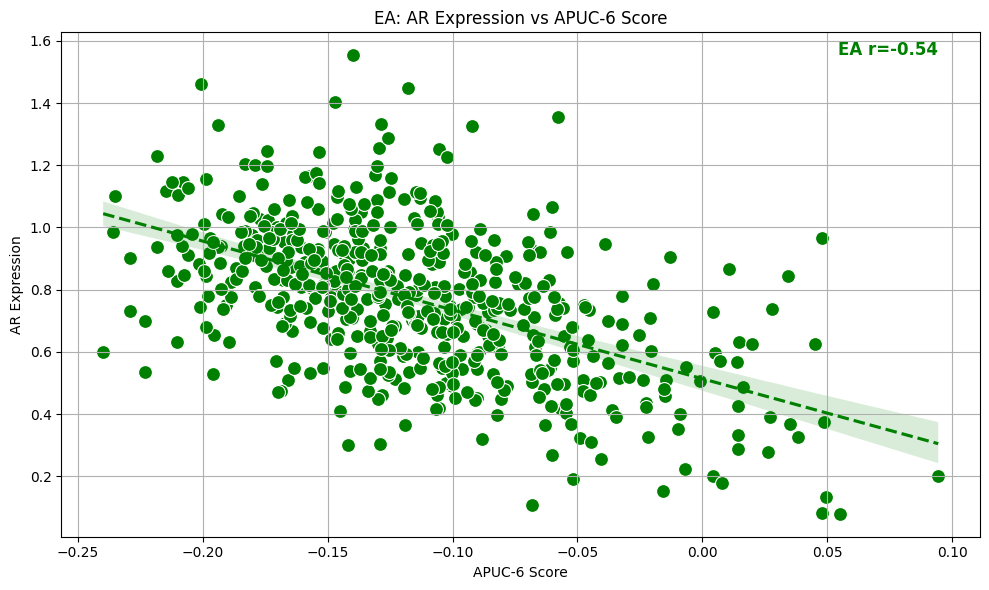

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient for AA
aa_data = plot_data[plot_data['Race'] == 'AA']
r_aa, _ = pearsonr(aa_data['APUC-6 Score'], aa_data['AR Expression'])

# Calculate Pearson correlation coefficient for EA
ea_data = plot_data[plot_data['Race'] == 'EA']
r_ea, _ = pearsonr(ea_data['APUC-6 Score'], ea_data['AR Expression'])

# Create a wider figure for AA
plt.figure(figsize=(10, 6))  # Increased width
sns.scatterplot(data=aa_data, x='APUC-6 Score', y='AR Expression', color='blue', s=100)
sns.regplot(data=aa_data, x='APUC-6 Score', y='AR Expression', scatter=False, color='blue', line_kws={"linestyle": "--"})
plt.title('AA: AR Expression vs APUC-6 Score')

# Adjust text position dynamically to the top right
x_max = max(aa_data['APUC-6 Score'])
y_max = max(aa_data['AR Expression'])
plt.text(x_max, y_max, f'AA r={r_aa:.2f}', color='blue', fontsize=12, fontweight='bold', ha='right')

plt.xlabel('APUC-6 Score')
plt.ylabel('AR Expression')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a wider figure for EA
plt.figure(figsize=(10, 6))  # Increased width
sns.scatterplot(data=ea_data, x='APUC-6 Score', y='AR Expression', color='green', s=100)
sns.regplot(data=ea_data, x='APUC-6 Score', y='AR Expression', scatter=False, color='green', line_kws={"linestyle": "--"})
plt.title('EA: AR Expression vs APUC-6 Score')

# Adjust text position dynamically to the top right
x_max = max(ea_data['APUC-6 Score'])
y_max = max(ea_data['AR Expression'])
plt.text(x_max, y_max, f'EA r={r_ea:.2f}', color='green', fontsize=12, fontweight='bold', ha='right')

plt.xlabel('APUC-6 Score')
plt.ylabel('AR Expression')
plt.grid(True)
plt.tight_layout()
plt.show()


### Splitting by Gleason Score

In [11]:
# Convert data to numeric and drop NaN values
plot_data['APUC-6 Score'] = pd.to_numeric(plot_data['APUC-6 Score'], errors='coerce')
plot_data['AR Expression'] = pd.to_numeric(plot_data['AR Expression'], errors='coerce')
plot_data['Gleason Score'] = pd.to_numeric(plot_data['Gleason Score'], errors='coerce')
plot_data.dropna(inplace=True)


# Create Gleason score buckets
plot_data['Gleason Bucket'] = pd.cut(plot_data['Gleason Score'], bins=[5, 6, 7, 10], labels=['6', '7', '8-10'])

print(plot_data['Gleason Score'])
print(plot_data['Gleason Bucket'])

sample 4       7.0
sample 5       7.0
sample 6       7.0
sample 7       7.0
sample 8       7.0
              ... 
sample 1148    9.0
sample 1149    7.0
sample 1150    7.0
sample 1151    7.0
sample 1152    7.0
Name: Gleason Score, Length: 1131, dtype: float64
sample 4          7
sample 5          7
sample 6          7
sample 7          7
sample 8          7
               ... 
sample 1148    8-10
sample 1149       7
sample 1150       7
sample 1151       7
sample 1152       7
Name: Gleason Bucket, Length: 1131, dtype: category
Categories (3, object): ['6' < '7' < '8-10']


/tmp/ipykernel_8069/2709016808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gleason_race_counts = plot_data.groupby(['Gleason Bucket', 'Race']).size().unstack()


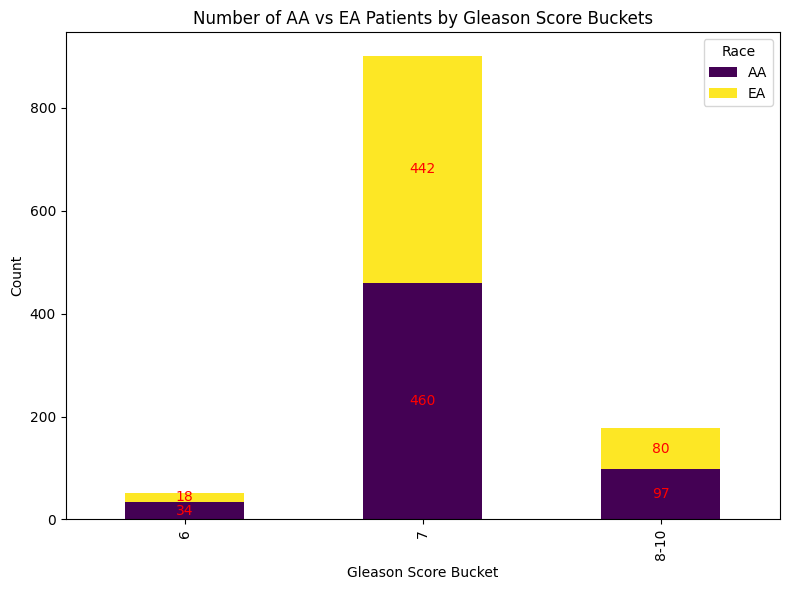

/tmp/ipykernel_8069/2709016808.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=bucket_data, palette='Set2')
/tmp/ipykernel_8069/2709016808.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1, i], x='Race', y='AR Expression', data=bucket_data, palette='Set2')
/tmp/ipykernel_8069/2709016808.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=bucket_data, palette='Set2')
/tmp/ipykernel_8069/2709016808.py:47: FutureWarning: 


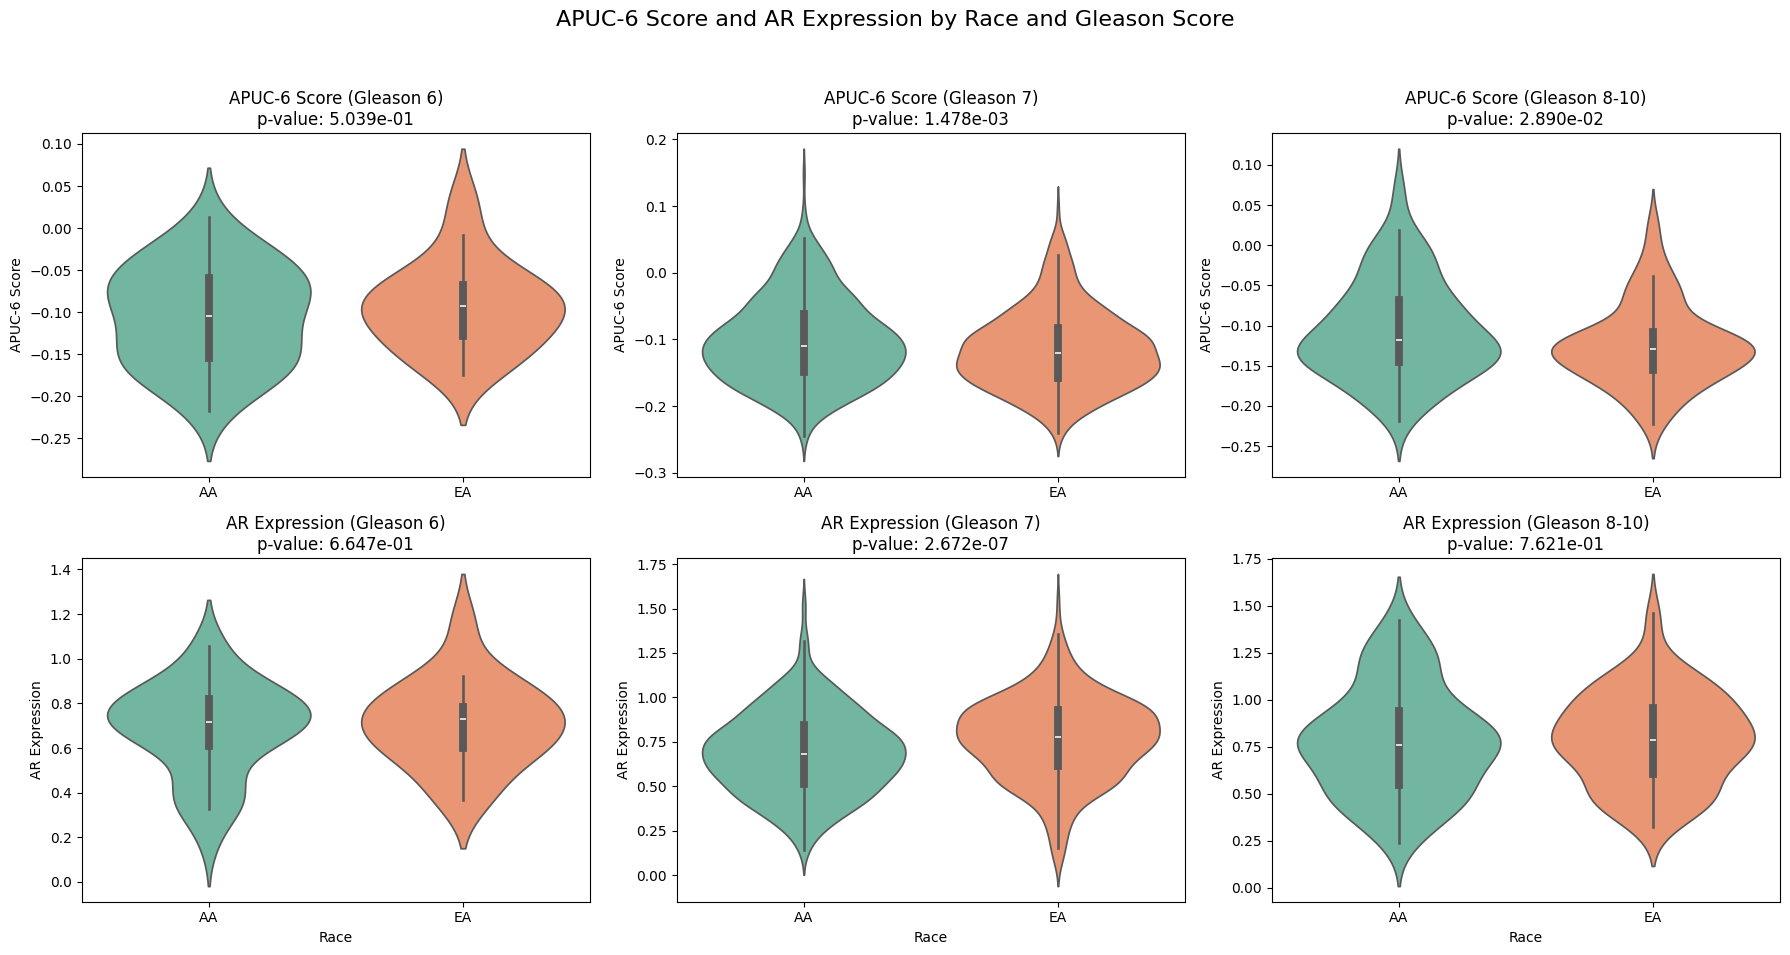

In [67]:
# Count the number of AA vs EA patients split by Gleason Score buckets
gleason_race_counts = plot_data.groupby(['Gleason Bucket', 'Race']).size().unstack()

# Plot the results
ax = gleason_race_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Number of AA vs EA Patients by Gleason Score Buckets')
plt.xlabel('Gleason Score Bucket')
plt.ylabel('Count')
plt.legend(title='Race')
plt.tight_layout()

# Annotate the bar plot with the count values
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='red')


plt.show()

# Set correct Gleason Buckets (6, 7, 8-10)
gleason_order = ['6', '7', '8-10']  # Updated categories

# Initialize the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Ensured enough space
fig.suptitle('APUC-6 Score and AR Expression by Race and Gleason Score', fontsize=16)

# Loop through each Gleason Bucket and plot
for i, bucket in enumerate(gleason_order):
    bucket_data = plot_data[plot_data['Gleason Bucket'] == bucket]
    
    # Perform statistical tests
    aa_apuc6 = bucket_data[bucket_data['Race'] == 'AA']['APUC-6 Score']
    ea_apuc6 = bucket_data[bucket_data['Race'] == 'EA']['APUC-6 Score']
    aa_ar = bucket_data[bucket_data['Race'] == 'AA']['AR Expression']
    ea_ar = bucket_data[bucket_data['Race'] == 'EA']['AR Expression']

    # Use t-test
    apuc6_pvalue = ttest_ind(aa_apuc6, ea_apuc6, nan_policy='omit').pvalue
    ar_pvalue = ttest_ind(aa_ar, ea_ar, nan_policy='omit').pvalue

    # Plot APUC-6 Score
    sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=bucket_data, palette='Set2')
    axes[0, i].set_title(f'APUC-6 Score (Gleason {bucket})\np-value: {apuc6_pvalue:.3e}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('APUC-6 Score')

    # Plot AR Expression
    sns.violinplot(ax=axes[1, i], x='Race', y='AR Expression', data=bucket_data, palette='Set2')
    axes[1, i].set_title(f'AR Expression (Gleason {bucket})\np-value: {ar_pvalue:.3e}')
    axes[1, i].set_xlabel('Race')
    axes[1, i].set_ylabel('AR Expression')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


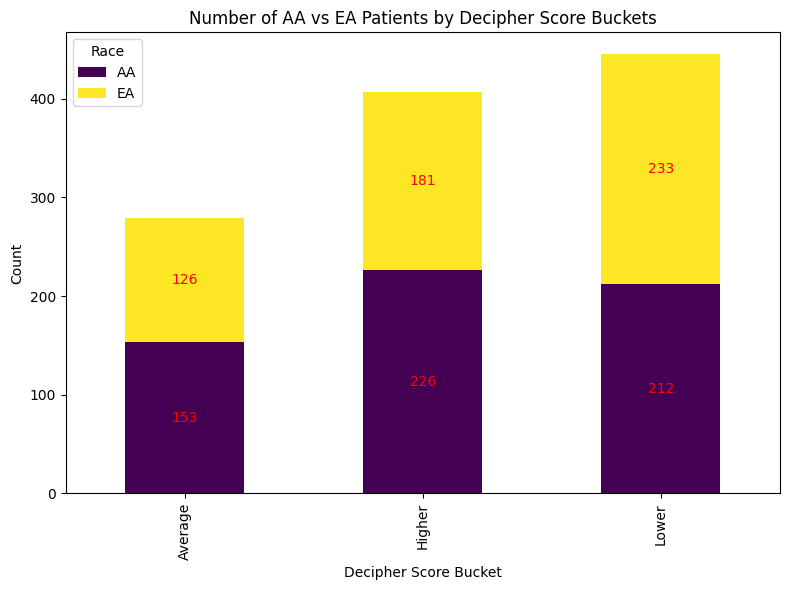

/tmp/ipykernel_8069/2875713573.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=category_data, palette='Set2')
/tmp/ipykernel_8069/2875713573.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1, i], x='Race', y='AR Expression', data=category_data, palette='Set2')
/tmp/ipykernel_8069/2875713573.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=category_data, palette='Set2')
/tmp/ipykernel_8069/2875713573.py:51: FutureWarn

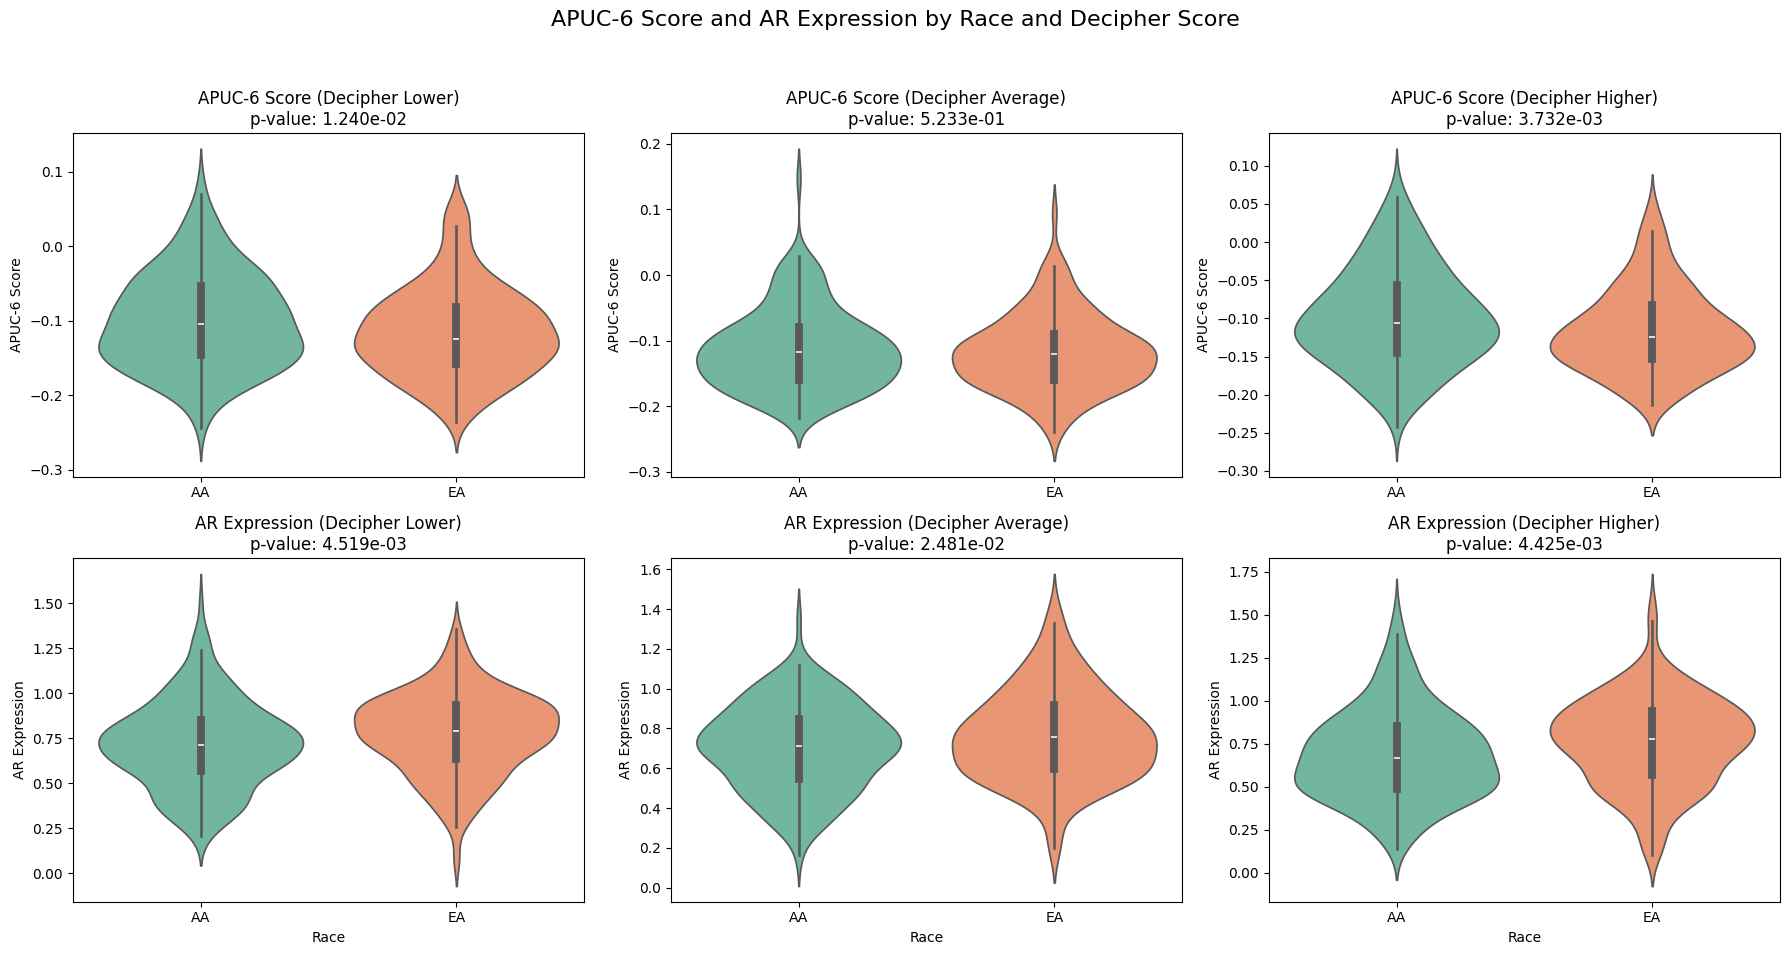

In [ ]:
# Count the number of AA vs EA patients split by Decipher Score buckets
decipher_race_counts = plot_data.groupby(['Decipher Score', 'Race']).size().unstack()

# Plot the results
ax = decipher_race_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Number of AA vs EA Patients by Decipher Score Buckets')
plt.xlabel('Decipher Score Bucket')
plt.ylabel('Count')
plt.legend(title='Race')
plt.tight_layout()

# Annotate the bar plot with the count values in red
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='red')

plt.show()

# Convert data to numeric and drop NaN values
plot_data['APUC-6 Score'] = pd.to_numeric(plot_data['APUC-6 Score'], errors='coerce')
plot_data['AR Expression'] = pd.to_numeric(plot_data['AR Expression'], errors='coerce')
plot_data.dropna(inplace=True)

# Define the order of Decipher Score categories
decipher_order = ['Lower', 'Average', 'Higher']

# Initialize the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('APUC-6 Score and AR Expression by Race and Decipher Score', fontsize=16)

# Plot and perform statistical tests for each Decipher Score category
for i, category in enumerate(decipher_order):
    category_data = plot_data[plot_data['Decipher Score'] == category]
    
    # Perform statistical tests
    aa_apuc6 = category_data[category_data['Race'] == 'AA']['APUC-6 Score']
    ea_apuc6 = category_data[category_data['Race'] == 'EA']['APUC-6 Score']
    aa_ar = category_data[category_data['Race'] == 'AA']['AR Expression']
    ea_ar = category_data[category_data['Race'] == 'EA']['AR Expression']

    # Use t-test
    apuc6_pvalue = ttest_ind(aa_apuc6, ea_apuc6, nan_policy='omit').pvalue
    ar_pvalue = ttest_ind(aa_ar, ea_ar, nan_policy='omit').pvalue

    # Plot APUC-6 Score
    sns.violinplot(ax=axes[0, i], x='Race', y='APUC-6 Score', data=category_data, palette='Set2')
    axes[0, i].set_title(f'APUC-6 Score (Decipher {category})\np-value: {apuc6_pvalue:.3e}')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('APUC-6 Score')

    # Plot AR Expression
    sns.violinplot(ax=axes[1, i], x='Race', y='AR Expression', data=category_data, palette='Set2')
    axes[1, i].set_title(f'AR Expression (Decipher {category})\np-value: {ar_pvalue:.3e}')
    axes[1, i].set_xlabel('Race')
    axes[1, i].set_ylabel('AR Expression')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('/home/user/cloud_storage/apuc6_ar_violinplot_decipher_combined.png')
plt.show()

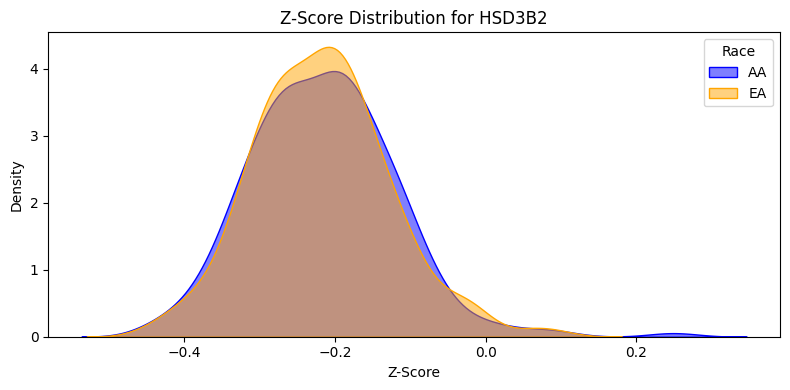

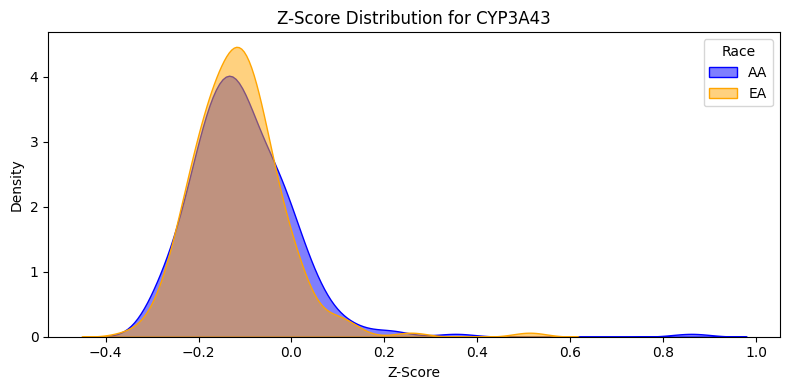

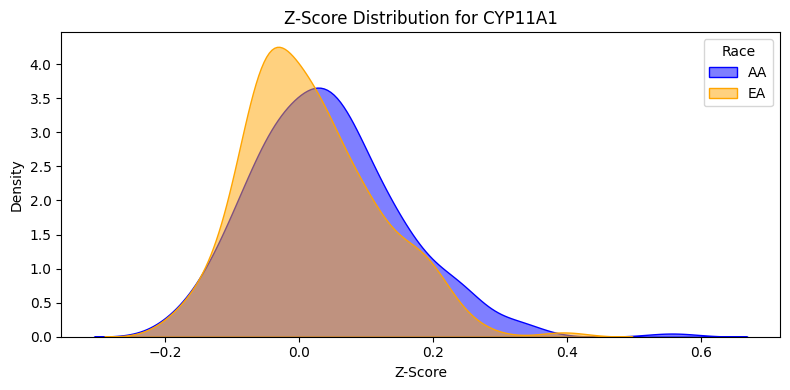

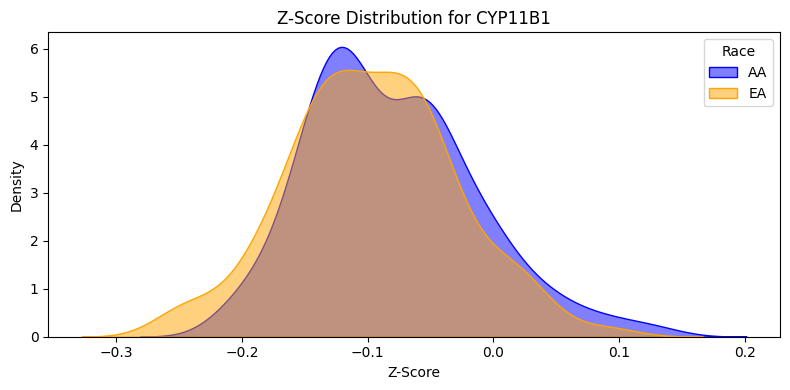

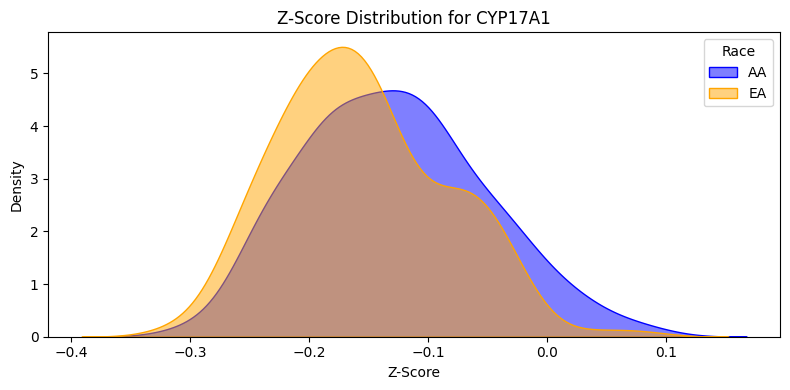

In [14]:
# Extract relevant data for the Decipher Score "Higher" group
decipher_scores = df_filtered[df_filtered['SAMPLE'] == 'decipher'].iloc[:, 1:].values.flatten()
higher_group_indices = [i for i, score in enumerate(decipher_scores) if score == 'Higher']
race_info = df_filtered[df_filtered['SAMPLE'] == 'race'].iloc[:, 1:].values.flatten()[higher_group_indices]

# Extract APUC-6 expression data for the "Higher" group
apuc6_data = df_filtered[df_filtered['SAMPLE'].isin(apuc6_genes)].iloc[:, 1:].T.iloc[higher_group_indices]

# Convert data to numeric and calculate z-scores
apuc6_data.columns = apuc6_genes  # Ensure columns are correctly labeled
apuc6_data = apuc6_data.apply(pd.to_numeric, errors='coerce')
apuc6_zscores = apuc6_data

# Create z-score distribution plots for each gene
for gene in apuc6_genes:
    plt.figure(figsize=(8, 4))

    # Plot AA and EA distributions
    sns.kdeplot(apuc6_zscores.loc[race_info == 'AA', gene], label='AA', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(apuc6_zscores.loc[race_info == 'EA', gene], label='EA', color='orange', fill=True, alpha=0.5)

    plt.title(f'Z-Score Distribution for {gene}')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.legend(title='Race')
    plt.tight_layout()
    # plt.savefig(f'/home/user/cloud_storage/{gene}_zscore_distribution_decipher_higher.png')
    plt.show()

### APUC6/AR High and Low Distribution

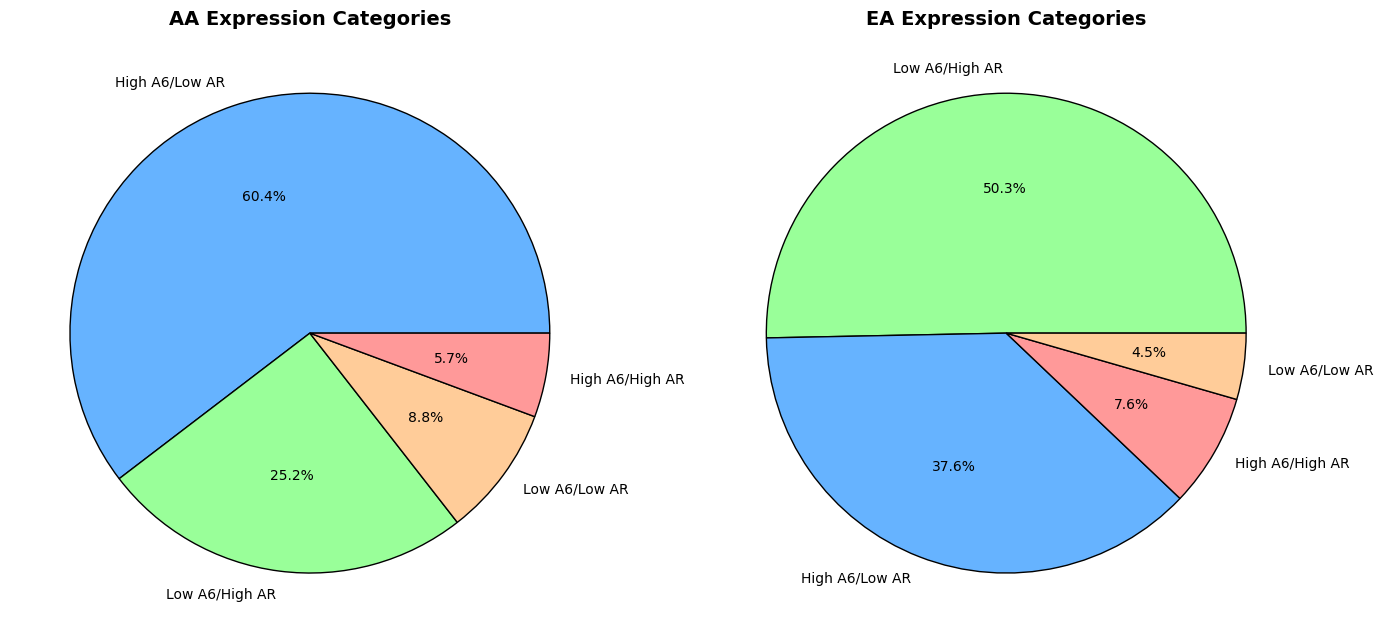

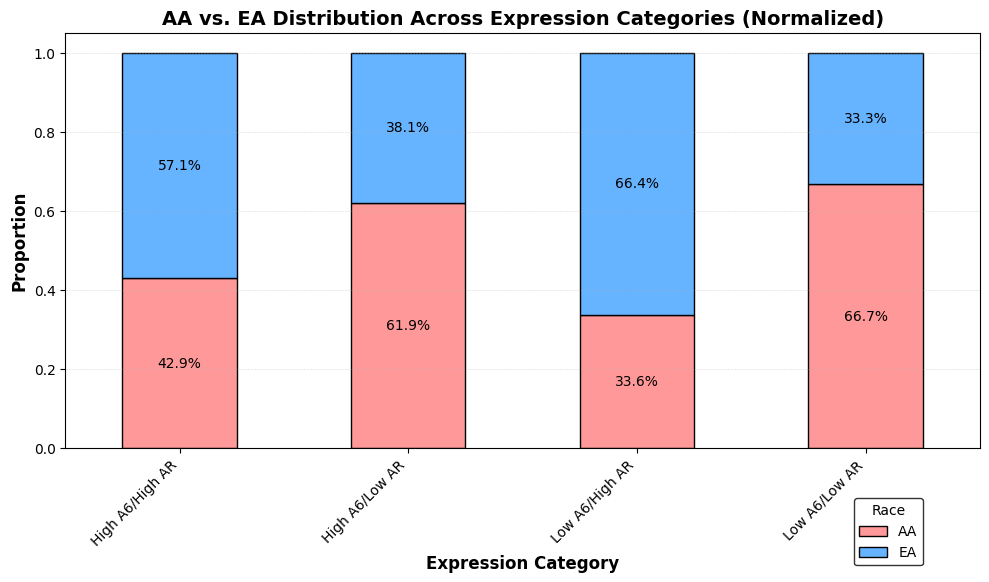

In [39]:
# Calculate 25th and 75th percentiles for APUC-6 and AR expression
apuc6_25th = plot_data['APUC-6 Score'].quantile(0.25)
apuc6_75th = plot_data['APUC-6 Score'].quantile(0.75)
ar_25th = plot_data['AR Expression'].quantile(0.25)
ar_75th = plot_data['AR Expression'].quantile(0.75)

# Create categories based on high/low APUC-6 and AR expression
def categorize_expression(row):
    apuc6_category = 'High A6' if row['APUC-6 Score'] > apuc6_75th else 'Low A6' if row['APUC-6 Score'] < apuc6_25th else 'Mid'
    ar_category = 'High AR' if row['AR Expression'] > ar_75th else 'Low AR' if row['AR Expression'] < ar_25th else 'Mid'
    return f"{apuc6_category}/{ar_category}"

plot_data['Expression Category'] = plot_data.apply(categorize_expression, axis=1)

# Filter out 'Mid' categories if needed
plot_data_with_category = plot_data[~plot_data['Expression Category'].str.contains('Mid')]

# Count the number of occurrences for each category in AA and EA
aa_counts = plot_data_with_category[plot_data_with_category['Race'] == 'AA']['Expression Category'].value_counts()
ea_counts = plot_data_with_category[plot_data_with_category['Race'] == 'EA']['Expression Category'].value_counts()

# Define consistent color mapping for categories
color_map = {
    'High A6/High AR': '#ff9999',  # Light Red
    'High A6/Low AR': '#66b3ff',   # Light Blue
    'Low A6/High AR': '#99ff99',   # Light Green
    'Low A6/Low AR': '#ffcc99'     # Light Orange
}

# PIE CHARTS ----------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='white')

# Function to plot pie charts with slightly thinner borders
def plot_pie(ax, counts, title):
    ax.pie(
        counts, labels=counts.index, autopct='%1.1f%%',
        colors=[color_map[cat] for cat in counts.index], wedgeprops={'edgecolor': 'black', 'linewidth': 1.0}  # Thinner border
    )
    ax.set_title(title, fontsize=14, fontweight='bold')

# AA Pie Chart
plot_pie(axes[0], aa_counts, 'AA Expression Categories')

# EA Pie Chart
plot_pie(axes[1], ea_counts, 'EA Expression Categories')

plt.tight_layout()
plt.show()

# STACKED BAR CHART (Normalized Y-axis with Percentage Labels) --------------------------------------------------------------

# Combine AA and EA counts for visualization
combined_counts = pd.DataFrame({'AA': aa_counts, 'EA': ea_counts}).fillna(0)

# Normalize the counts (convert to proportions where sum per category = 1)
normalized_counts = combined_counts.div(combined_counts.sum(axis=1), axis=0)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Plot stacked bars (normalized)
bars = normalized_counts.plot(kind='bar', stacked=True, color=[color_map[cat] for cat in normalized_counts.index], ax=ax, edgecolor='black', linewidth=1.0)

# Title and labels 
plt.title("AA vs. EA Distribution Across Expression Categories (Normalized)", fontsize=14, fontweight='bold')
plt.xlabel("Expression Category", fontsize=12, fontweight='bold')
plt.ylabel("Proportion", fontsize=12, fontweight='bold')  # Updated label to reflect normalization
plt.xticks(rotation=45, ha='right')

# Grid lines behind bars
plt.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.5, zorder=1)

# Legend position
plt.legend(title="Race", labels=['AA', 'EA'], loc='lower center', bbox_to_anchor=(0.9, -0.3), fontsize=10, ncol=1, edgecolor='black')

# Add percentage labels inside the bars
for bar_container in bars.containers:
    for bar in bar_container:
        height = bar.get_height()
        ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center the text
                bar.get_y() + height / 2,  # Place text in middle of section
                f"{height * 100:.1f}%",  # Convert proportion to percentage
                ha='center', va='center', fontsize=10, color='black'
            )
            

plt.tight_layout()
plt.show()

/tmp/ipykernel_8069/2065260895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_with_category['Decipher Score'] = plot_data_with_category['Decipher Score'].astype(str)
/tmp/ipykernel_8069/2065260895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_with_category['Gleason Score'] = pd.to_numeric(plot_data_with_category['Gleason Score'], errors='coerce')
/tmp/ipykernel_8069/2065260895.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

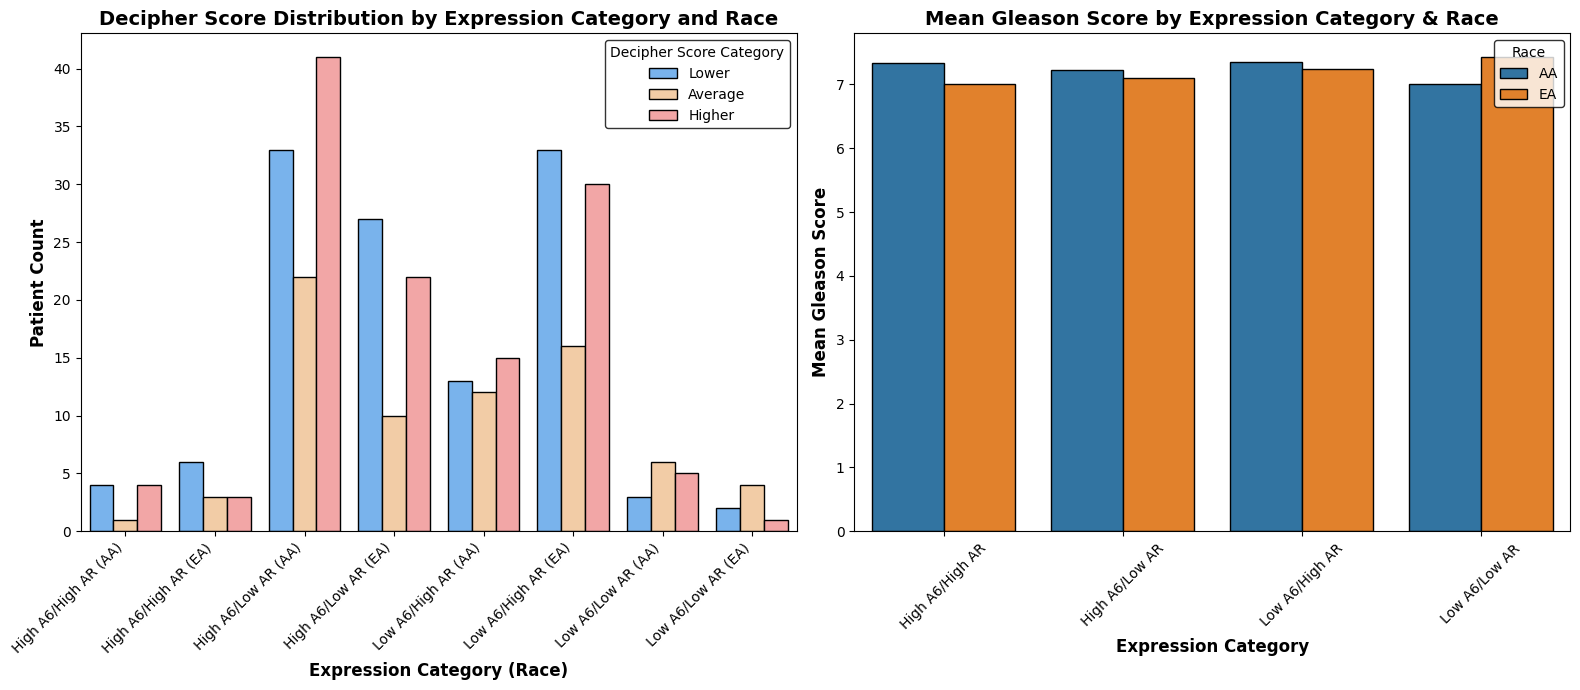

In [54]:
# Ensure Decipher Score and Gleason Score are properly formatted
plot_data_with_category['Decipher Score'] = plot_data_with_category['Decipher Score'].astype(str)
plot_data_with_category['Gleason Score'] = pd.to_numeric(plot_data_with_category['Gleason Score'], errors='coerce')

# Define expected Decipher Score categories
decipher_categories = ['Lower', 'Average', 'Higher']

# Count number of patients in each Decipher Score category split by Race within each Expression Category
ds_race_counts = plot_data_with_category.groupby(['Expression Category', 'Race', 'Decipher Score']).size().unstack(fill_value=0)

# Reset index for better plotting format, ensuring Race is incorporated in the x-axis labels
ds_race_counts = ds_race_counts.reset_index().melt(id_vars=['Expression Category', 'Race'], 
                                                    var_name='Decipher Score', 
                                                    value_name='Count')

# Ensure correct ordering of Decipher Score categories
ds_race_counts['Decipher Score'] = pd.Categorical(ds_race_counts['Decipher Score'], 
                                                  categories=decipher_categories, 
                                                  ordered=True)

# Create combined labels for Expression Category and Race
ds_race_counts['Category_Label'] = ds_race_counts['Expression Category'] + " (" + ds_race_counts['Race'] + ")"

# Compute mean Gleason Score per subgroup split by Race (AA vs EA)
gs_race_characteristics = (
    plot_data_with_category
    .groupby(['Expression Category', 'Race'])[['Gleason Score']]
    .mean()
    .reset_index()
)

# Create combined labels for Expression Category and Race in Gleason Score dataset
gs_race_characteristics['Category_Label'] = gs_race_characteristics['Expression Category'] + " (" + gs_race_characteristics['Race'] + ")"

# Define color palettes
decipher_palette = {"Lower": "#66b3ff", "Average": "#ffcc99", "Higher": "#ff9999"}  # Blue, Orange, Red
race_palette = {"AA": "#1f77b4", "EA": "#ff7f0e"}  # Blue for AA, Orange for EA

# Create subplots for AA vs EA Decipher and Gleason Score characteristics
fig, axes = plt.subplots(1, 2, figsize=(16, 7), facecolor='white')

# Decipher Score Category Distribution with combined Race labels
sns.barplot(
    data=ds_race_counts, x='Category_Label', y='Count', hue='Decipher Score',
    palette=decipher_palette, ax=axes[0], edgecolor='black', linewidth=1.0
)

axes[0].set_title("Decipher Score Distribution by Expression Category and Race", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Expression Category (Race)", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Patient Count", fontsize=12, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Corrected this line
axes[0].legend(title="Decipher Score Category", edgecolor='black')

# Gleason Score Comparison (Ensuring correct calculation)
sns.barplot(
    data=gs_characteristics, x='Expression Category', y='Gleason Score', hue='Race', ax=axes[1],
    palette=race_palette, edgecolor='black', linewidth=1.0
)
axes[1].set_title("Mean Gleason Score by Expression Category & Race", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Expression Category", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Mean Gleason Score", fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Race", edgecolor='black')

# Adjust layout
plt.tight_layout()
plt.show()

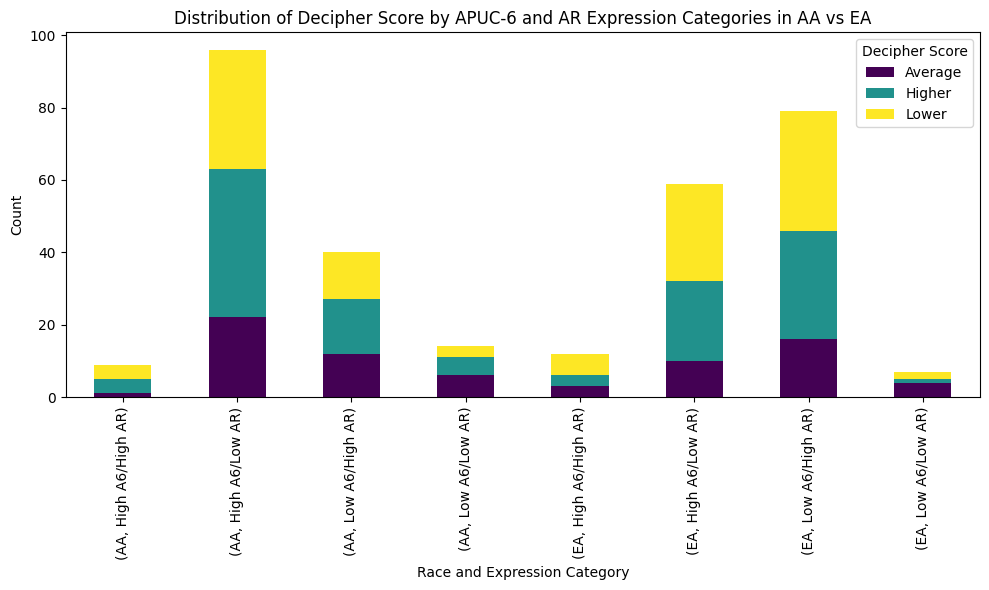

In [ ]:
# Calculate 25th and 75th percentiles for APUC-6 and AR expression
apuc6_25th = plot_data['APUC-6 Score'].quantile(0.25)
apuc6_75th = plot_data['APUC-6 Score'].quantile(0.75)
ar_25th = plot_data['AR Expression'].quantile(0.25)
ar_75th = plot_data['AR Expression'].quantile(0.75)

# Create categories based on high/low APUC-6 and AR expression
def categorize_expression(row):
    apuc6_category = 'High A6' if row['APUC-6 Score'] > apuc6_75th else 'Low A6' if row['APUC-6 Score'] < apuc6_25th else 'Mid'
    ar_category = 'High AR' if row['AR Expression'] > ar_75th else 'Low AR' if row['AR Expression'] < ar_25th else 'Mid'
    return f"{apuc6_category}/{ar_category}"

plot_data['Expression Category'] = plot_data.apply(categorize_expression, axis=1)

# Filter out 'Mid' categories if needed
plot_data_with_category = plot_data[~plot_data['Expression Category'].str.contains('Mid')]

# Group by Race and Expression Category
grouped_data = plot_data_with_category.groupby(['Race', 'Expression Category', 'Decipher Score']).size().unstack(fill_value=0)

# Plot the distribution
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of Decipher Score by APUC-6 and AR Expression Categories in AA vs EA')
plt.xlabel('Race and Expression Category')
plt.ylabel('Count')
plt.legend(title='Decipher Score')
plt.tight_layout()
# plt.savefig('/home/user/cloud_storage/decipher_distribution_apuc6_ar_expression_25th_75th.png')
plt.show()